In [94]:
from matplotlib.pyplot import imshow
from IPython.display import display
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageChops
import cv2
import numpy as np
import glob, os

In [6]:
ls ..

data/    LICENSE.txt*  README.md*  test.py*   zizi-data/
docker/  models/       scripts/    train.py*  zizi-scripts/
imgs/    options/      script.sh   util/


In [204]:

# src = Image.open('results/test_img/000050.png')
# src2 = src.resize((960,1080))
# display(src2)

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

def make_img(im):
    # CV make invert BW
#     im = cv2.imread('../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png')
#     print(im.shape)
    im = cv2.resize(im, (832, 832)) # 832
#     display(im)

#     print(im.shape)
    im = im/255.0
    im_power_law_transformation = cv2.pow(im,0.01)
    im_PIL = Image.fromarray((im_power_law_transformation * 255).astype(np.uint8))
    display(Image.fromarray((im * 255).astype(np.uint8)))
    im_invert = ImageOps.invert(im_PIL).convert('L')

    # make sil

    blur1 = im_invert.filter(ImageFilter.GaussianBlur(radius=2))
    im_sil = add_margin(blur1, 0, 100, 30, 0, color='#FFFFFF')
    # display(im_sil)

    # makeshadow

    blur = im_invert.filter(ImageFilter.GaussianBlur(radius=10)) #25

    enhancer = ImageEnhance.Contrast(blur)
    im_shadow = enhancer.enhance(1.3)
    im_shadow = add_margin(im_shadow, 30, 0, 0, 100, color='#FFFFFF')
    final_img = ImageChops.multiply(im_shadow, im_sil)
#     print(final_img.size)
    # display(final_img)


    cutoff = 580
    warpNum = 300

    img = np.array(im_shadow)

#     print(img.shape)

    pts1 = np.float32(
        [[0, cutoff],
         [832, cutoff],
         [0, 900],
         [832, 900]]
    )
    pts2 = np.float32(
        [[0, cutoff],
         [832, cutoff],
         [-warpNum, 800],
         [832-warpNum, 800]]
    )    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img, M, (932, 862), cv2.INTER_LINEAR, borderValue=(255))

    btmsdw = Image.fromarray((dst).astype(np.uint8))
#     print(btmsdw.size)
    btmsdw_crp = btmsdw.crop((0, cutoff, 932, 862))
    btmsdw_crp_tp = add_margin(btmsdw_crp, cutoff, 0, 0, 0, color='#FFFFFF')
    btmsdw_crp_tp_br = btmsdw_crp_tp.filter(ImageFilter.GaussianBlur(radius=15))

#     print(im_shadow.size)
    sdw1_crp = im_shadow.crop((0, 0, 932, 862-(862-cutoff+30)+50))
    sdw1_crp_tp = add_margin(sdw1_crp, 0, 0, (862-cutoff)+50, 0, color='#FFFFFF')
    sdw1_crp_tp_br = sdw1_crp_tp.filter(ImageFilter.GaussianBlur(radius=25))

    shadow_mix = ImageChops.multiply(sdw1_crp_tp_br, btmsdw_crp_tp_br)




    # Make final


    final_img_comp = ImageChops.multiply(shadow_mix, im_sil)
    final_img = final_img_comp.crop((0, 0, 832, 832)) 
#     print(final_img.size)

    return  final_img
#     display(final_img)



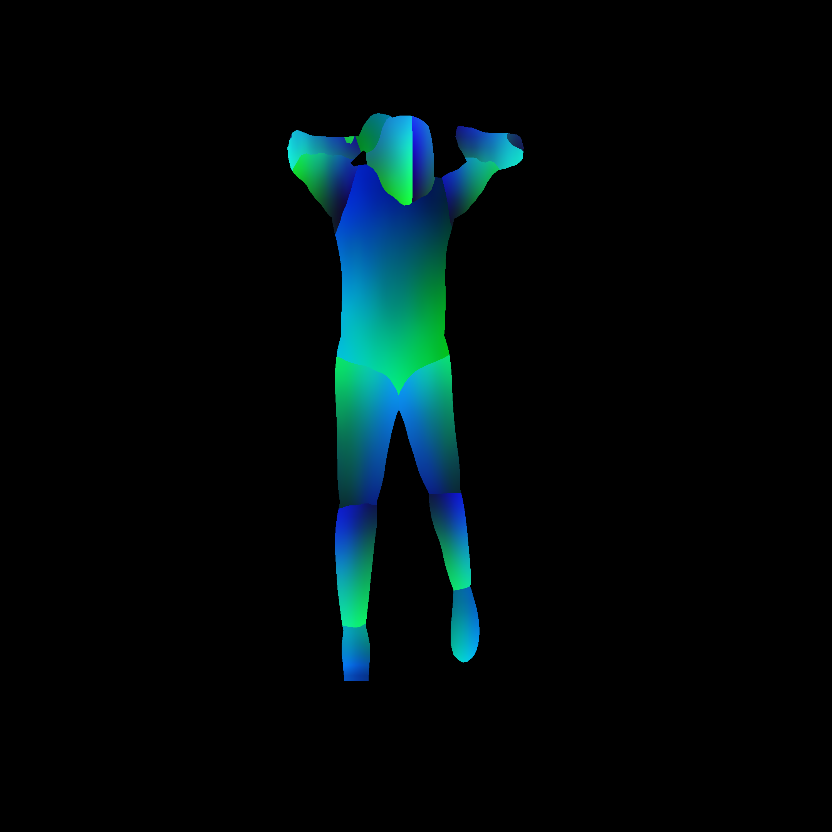

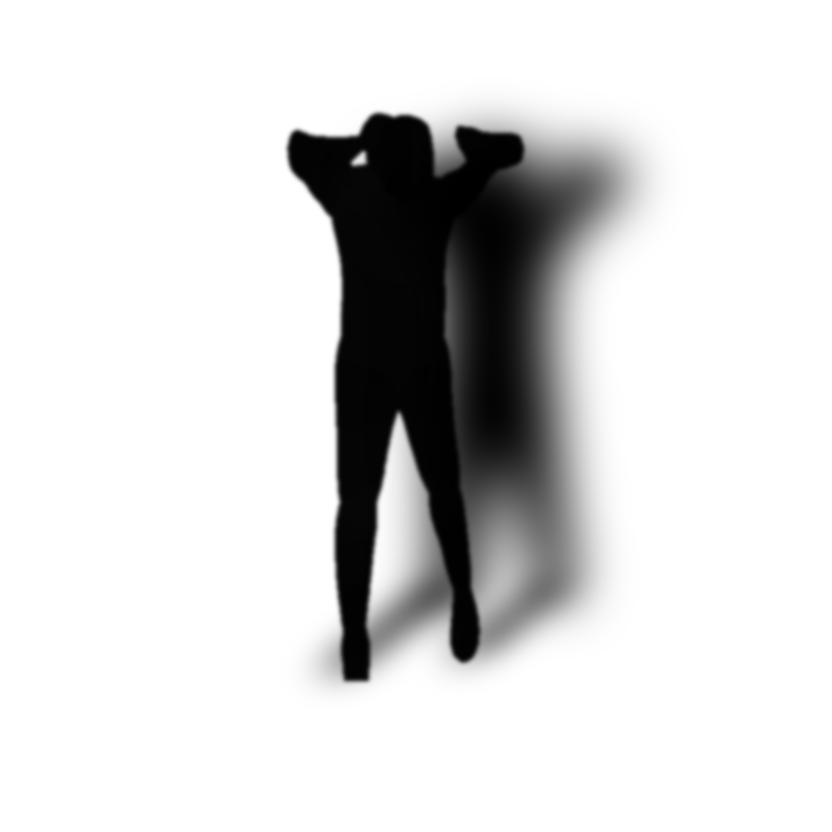

In [205]:
im = cv2.imread('../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png')
display(make_img(im))


In [200]:
!rm -rf ../zizi-data/datasets/acts/full/test_shadow/*

In [201]:
# directory = "fiveyears-ruby-full"
# ../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png

for d in sorted(glob.glob("../zizi-data/datasets/acts/full/test_densepose/*")):
    print(os.path.basename(d))
    directory = os.path.basename(d)
    
    sdir = "../zizi-data/datasets/acts/full/test_shadow/"+directory+"/"

    if not os.path.exists(sdir):
        os.mkdir(sdir)

    for file in sorted(glob.glob("../zizi-data/datasets/acts/full/test_densepose/"+directory+"/*.png")):
        name = os.path.basename(file).replace('_IUV.png','')
        print(name)

        im = cv2.imread(file)
        
        make_img(im).save(sdir+name+".png")

fiveyears-ruby-full
000001
000002
000003
000004
000005
000006
000007
000008
000009
000010
000011
000012
000013
000014
000015
000016
000017
000018
000019
000020
000021
000022
000023
000024
000025
000026
000027
000028
000029
000030
000031
000032
000033
000034
000035
000036
000037
000038
000039
000040
000041
000042
000043
000044
000045
000046
000047
000048
000049
000050
000051
000052
000053
000054
000055
000056
000057
000058
000059
000060
000061
000062
000063
000064
000065
000066
000067
000068
000069
000070
000071
000072
000073
000074
000075
000076
000077
000078
000079
000080
000081
000082
000083
000084
000085
000086
000087
000088
000089
000090
000091
000092
000093
000094
000095
000096
000097
000098
000099
000100
000101
000102
000103
000104
000105
000106
000107
000108
000109
000110
000111
000112
000113
000114
000115
000116
000117
000118
000119
000120
000121
000122
000123
000124
000125
000126
000127
000128
000129
000130
000131
000132
000133
000134
000135
000136
000137
000138
000139
000140


001169
001170
001171
001172
001173
001174
001175
001176
001177
001178
001179
001180
001181
001182
001183
001184
001185
001186
001187
001188
001189
001190
001191
001192
001193
001194
001195
001196
001197
001198
001199
001200
001201
001202
001203
001204
001205
001206
001207
001208
001209
001210
001211
001212
001213
001214
001215
001216
001217
001218
001219
001220
001221
001222
001223
001224
001225
001226
001227
001228
001229
001230
001231
001232
001233
001234
001235
001236
001237
001238
001239
001240
001241
001242
001243
001244
001245
001246
001247
001248
001249
001250
001251
001252
001253
001254
001255
001256
001257
001258
001259
001260
001261
001262
001263
001264
001265
001266
001267
001268
001269
001270
001271
001272
001273
001274
001275
001276
001277
001278
001279
001280
001281
001282
001283
001284
001285
001286
001287
001288
001289
001290
001291
001292
001293
001294
001295
001296
001297
001298
001299
001300
001301
001302
001303
001304
001305
001306
001307
001308
001309
001310
001311

002341
002342
002343
002344
002345
002346
002347
002348
002349
002350
002351
002352
002353
002354
002355
002356
002357
002358
002359
002360
002361
002362
002363
002364
002365
002366
002367
002368
002369
002370
002371
002372
002373
002374
002375
002376
002377
002378
002379
002380
002381
002382
002383
002384
002385
002386
002387
002388
002389
002390
002391
002392
002393
002394
002395
002396
002397
002398
002399
002400
002401
002402
002403
002404
002405
002406
002407
002408
002409
002410
002411
002412
002413
002414
002415
002416
002417
002418
002419
002420
002421
002422
002423
002424
002425
002426
002427
002428
002429
002430
002431
002432
002433
002434
002435
002436
002437
002438
002439
002440
002441
002442
002443
002444
002445
002446
002447
002448
002449
002450
002451
002452
002453
002454
002455
002456
002457
002458
002459
002460
002461
002462
002463
002464
002465
002466
002467
002468
002469
002470
002471
002472
002473
002474
002475
002476
002477
002478
002479
002480
002481
002482
002483

003512
003513
003514
003515
003516
003517
003518
003519
003520
003521
003522
003523
003524
003525
003526
003527
003528
003529
003530
003531
003532
003533
003534
003535
003536
003537
003538
003539
003540
003541
003542
003543
003544
003545
003546
003547
003548
003549
003550
003551
003552
003553
003554
003555
003556
003557
003558
003559
003560
003561
003562
003563
003564
003565
003566
003567
003568
003569
003570
003571
003572
003573
003574
003575
003576
003577
003578
003579
003580
003581
003582
003583
003584
003585
003586
003587
003588
003589
003590
003591
003592
003593
003594
003595
003596
003597
003598
003599
003600
003601
003602
003603
003604
003605
003606
003607
003608
003609
003610
003611
003612
003613
003614
003615
003616
003617
003618
003619
003620
003621
003622
003623
003624
003625
003626
003627
003628
003629
003630
003631
003632
003633
003634
003635
003636
003637
003638
003639
003640
003641
003642
003643
003644
003645
003646
003647
003648
003649
003650
003651
003652
003653
003654

004684
004685
004686
004687
004688
004689
004690
004691
004692
004693
004694
004695
004696
004697
004698
004699
004700
004701
004702
004703
004704
004705
004706
004707
004708
004709
004710
004711
004712
004713
004714
004715
004716
004717
004718
004719
004720
004721
004722
004723
004724
004725
004726
004727
004728
004729
004730
004731
004732
004733
004734
004735
004736
004737
004738
004739
004740
004741
004742
004743
004744
004745
004746
004747
004748
004749
004750
004751
004752
004753
004754
004755
004756
004757
004758
004759
004760
004761
004762
004763
004764
004765
004766
004767
004768
004769
004770
004771
004772
004773
004774
004775
004776
004777
004778
004779
004780
004781
004782
004783
004784
004785
004786
004787
004788
004789
004790
004791
004792
004793
004794
004795
004796
004797
004798
004799
004800
004801
004802
004803
004804
004805
004806
004807
004808
004809
004810
004811
004812
004813
004814
004815
004816
004817
004818
004819
004820
004821
004822
004823
004824
004825
004826

005856
005857
005858
005859
005860
005861
005862
005863
005864
005865
005866
005867
005868
005869
005870
005871
005872
005873
005874
005875
005876
005877
005878
005879
005880
005881
005882
005883
005884
005885
005886
005887
005888
005889
005890
005891
005892
005893
005894
005895
005896
005897
005898
005899
005900
005901
005902
005903
005904
005905
005906
005907
005908
005909
005910
005911
005912
005913
005914
005915
005916
005917
005918
005919
005920
005921
005922
005923
005924
005925
005926
005927
005928
005929
005930
005931
005932
005933
005934
005935
005936
005937
005938
005939
005940
005941
005942
005943
005944
005945
005946
005947
005948
005949
005950
005951
005952
005953
005954
005955
005956
005957
005958
005959
005960
005961
005962
005963
005964
005965
005966
005967
005968
005969
005970
005971
005972
005973
005974
005975
005976
005977
005978
005979
005980
005981
005982
005983
005984
005985
005986
005987
005988
005989
005990
005991
005992
005993
005994
005995
005996
005997
005998

007027
007028
007029
007030
007031
007032
007033
007034
007035
007036
007037
007038
007039
007040
007041
007042
007043
007044
007045
007046
007047
007048
007049
007050
007051
007052
007053
007054
007055
007056
007057
007058
007059
007060
007061
007062
freedom-mark-full
000001
000002
000003
000004
000005
000006
000007
000008
000009
000010
000011
000012
000013
000014
000015
000016
000017
000018
000019
000020
000021
000022
000023
000024
000025
000026
000027
000028
000029
000030
000031
000032
000033
000034
000035
000036
000037
000038
000039
000040
000041
000042
000043
000044
000045
000046
000047
000048
000049
000050
000051
000052
000053
000054
000055
000056
000057
000058
000059
000060
000061
000062
000063
000064
000065
000066
000067
000068
000069
000070
000071
000072
000073
000074
000075
000076
000077
000078
000079
000080
000081
000082
000083
000084
000085
000086
000087
000088
000089
000090
000091
000092
000093
000094
000095
000096
000097
000098
000099
000100
000101
000102
000103
000104
00

001134
001135
001136
001137
001138
001139
001140
001141
001142
001143
001144
001145
001146
001147
001148
001149
001150
001151
001152
001153
001154
001155
001156
001157
001158
001159
001160
001161
001162
001163
001164
001165
001166
001167
001168
001169
001170
001171
001172
001173
001174
001175
001176
001177
001178
001179
001180
001181
001182
001183
001184
001185
001186
001187
001188
001189
001190
001191
001192
001193
001194
001195
001196
001197
001198
001199
001200
001201
001202
001203
001204
001205
001206
001207
001208
001209
001210
001211
001212
001213
001214
001215
001216
001217
001218
001219
001220
001221
001222
001223
001224
001225
001226
001227
001228
001229
001230
001231
001232
001233
001234
001235
001236
001237
001238
001239
001240
001241
001242
001243
001244
001245
001246
001247
001248
001249
001250
001251
001252
001253
001254
001255
001256
001257
001258
001259
001260
001261
001262
001263
001264
001265
001266
001267
001268
001269
001270
001271
001272
001273
001274
001275
001276

002306
002307
002308
002309
002310
002311
002312
002313
002314
002315
002316
002317
002318
002319
002320
002321
002322
002323
002324
002325
002326
002327
002328
002329
002330
002331
002332
002333
002334
002335
002336
002337
002338
002339
002340
002341
002342
002343
002344
002345
002346
002347
002348
002349
002350
002351
002352
002353
002354
002355
002356
002357
002358
002359
002360
002361
002362
002363
002364
002365
002366
002367
002368
002369
002370
002371
002372
002373
002374
002375
002376
002377
002378
002379
002380
002381
002382
002383
002384
002385
002386
002387
002388
002389
002390
002391
002392
002393
002394
002395
002396
002397
002398
002399
002400
002401
002402
002403
002404
002405
002406
002407
002408
002409
002410
002411
002412
002413
002414
002415
002416
002417
002418
002419
002420
002421
002422
002423
002424
002425
002426
002427
002428
002429
002430
002431
002432
002433
002434
002435
002436
002437
002438
002439
002440
002441
002442
002443
002444
002445
002446
002447
002448

003477
003478
003479
003480
003481
003482
003483
003484
003485
003486
003487
003488
003489
003490
003491
003492
003493
003494
003495
003496
003497
003498
003499
003500
003501
003502
003503
003504
003505
003506
003507
003508
003509
003510
003511
003512
003513
003514
003515
003516
003517
003518
003519
003520
003521
003522
003523
003524
003525
003526
003527
003528
003529
003530
003531
003532
003533
003534
003535
003536
003537
003538
003539
003540
003541
003542
003543
003544
003545
003546
003547
003548
003549
003550
003551
003552
003553
003554
003555
003556
003557
003558
003559
003560
003561
003562
003563
003564
003565
003566
003567
003568
003569
003570
003571
003572
003573
003574
003575
003576
003577
003578
003579
003580
003581
003582
003583
003584
003585
003586
003587
003588
003589
003590
003591
003592
003593
003594
003595
003596
003597
003598
003599
003600
003601
003602
003603
003604
003605
003606
003607
003608
003609
003610
003611
003612
003613
003614
003615
003616
003617
003618
003619

004648
004649
004650
004651
004652
004653
004654
004655
004656
004657
004658
004659
004660
004661
004662
004663
004664
004665
004666
004667
004668
004669
004670
004671
004672
004673
004674
004675
004676
004677
004678
004679
004680
004681
004682
004683
004684
004685
004686
004687
004688
004689
004690
004691
004692
004693
004694
004695
004696
004697
004698
004699
004700
004701
004702
004703
004704
004705
004706
004707
004708
004709
004710
004711
004712
004713
004714
004715
004716
004717
004718
004719
004720
004721
004722
004723
004724
004725
004726
004727
004728
004729
004730
004731
004732
004733
004734
004735
004736
004737
004738
004739
004740
004741
004742
004743
004744
004745
004746
004747
004748
004749
004750
004751
004752
004753
004754
004755
004756
004757
004758
004759
004760
004761
004762
004763
004764
004765
004766
004767
004768
004769
004770
004771
004772
004773
004774
004775
004776
004777
004778
004779
004780
004781
004782
004783
004784
004785
004786
004787
004788
004789
004790

005819
005820
005821
005822
005823
005824
005825
005826
005827
005828
005829
005830
005831
005832
005833
005834
005835
005836
005837
005838
005839
005840
005841
005842
005843
005844
005845
005846
005847
005848
005849
005850
005851
005852
005853
005854
005855
005856
005857
005858
005859
005860
005861
005862
005863
005864
005865
005866
005867
005868
005869
005870
005871
005872
005873
005874
005875
005876
005877
005878
005879
005880
005881
005882
005883
005884
005885
005886
005887
005888
005889
005890
005891
005892
005893
005894
005895
005896
005897
005898
005899
005900
005901
005902
005903
005904
005905
005906
005907
005908
005909
005910
005911
005912
005913
005914
005915
005916
005917
005918
005919
005920
005921
005922
005923
005924
005925
005926
005927
005928
005929
005930
005931
005932
005933
005934
005935
005936
005937
005938
005939
005940
005941
005942
005943
005944
005945
005946
005947
005948
005949
005950
005951
005952
005953
005954
005955
005956
005957
005958
005959
005960
005961

000185
000186
000187
000188
000189
000190
000191
000192
000193
000194
000195
000196
000197
000198
000199
000200
000201
000202
000203
000204
000205
000206
000207
000208
000209
000210
000211
000212
000213
000214
000215
000216
000217
000218
000219
000220
000221
000222
000223
000224
000225
000226
000227
000228
000229
000230
000231
000232
000233
000234
000235
000236
000237
000238
000239
000240
000241
000242
000243
000244
000245
000246
000247
000248
000249
000250
000251
000252
000253
000254
000255
000256
000257
000258
000259
000260
000261
000262
000263
000264
000265
000266
000267
000268
000269
000270
000271
000272
000273
000274
000275
000276
000277
000278
000279
000280
000281
000282
000283
000284
000285
000286
000287
000288
000289
000290
000291
000292
000293
000294
000295
000296
000297
000298
000299
000300
000301
000302
000303
000304
000305
000306
000307
000308
000309
000310
000311
000312
000313
000314
000315
000316
000317
000318
000319
000320
000321
000322
000323
000324
000325
000326
000327

001357
001358
001359
001360
001361
001362
001363
001364
001365
001366
001367
001368
001369
001370
001371
001372
001373
001374
001375
001376
001377
001378
001379
001380
001381
001382
001383
001384
001385
001386
001387
001388
001389
001390
001391
001392
001393
001394
001395
001396
001397
001398
001399
001400
001401
001402
001403
001404
001405
001406
001407
001408
001409
001410
001411
001412
001413
001414
001415
001416
001417
001418
001419
001420
001421
001422
001423
001424
001425
001426
001427
001428
001429
001430
001431
001432
001433
001434
001435
001436
001437
001438
001439
001440
001441
001442
001443
001444
001445
001446
001447
001448
001449
001450
001451
001452
001453
001454
001455
001456
001457
001458
001459
001460
001461
001462
001463
001464
001465
001466
001467
001468
001469
001470
001471
001472
001473
001474
001475
001476
001477
001478
001479
001480
001481
001482
001483
001484
001485
001486
001487
001488
001489
001490
001491
001492
001493
001494
001495
001496
001497
001498
001499

002529
002530
002531
002532
002533
002534
002535
002536
002537
002538
002539
002540
002541
002542
002543
002544
002545
002546
002547
002548
002549
002550
002551
002552
002553
002554
002555
002556
002557
002558
002559
002560
002561
002562
002563
002564
002565
002566
002567
002568
002569
002570
002571
002572
002573
002574
002575
002576
002577
002578
002579
002580
002581
002582
002583
002584
002585
002586
002587
002588
002589
002590
002591
002592
002593
002594
002595
002596
002597
002598
002599
002600
002601
002602
002603
002604
002605
002606
002607
002608
002609
002610
002611
002612
002613
002614
002615
002616
002617
002618
002619
002620
002621
002622
002623
002624
002625
002626
002627
002628
002629
002630
002631
002632
002633
002634
002635
002636
002637
002638
002639
002640
002641
002642
002643
002644
002645
002646
002647
002648
002649
002650
002651
002652
002653
002654
002655
002656
002657
002658
002659
002660
002661
002662
002663
002664
002665
002666
002667
002668
002669
002670
002671

003701
003702
003703
003704
003705
003706
003707
003708
003709
003710
003711
003712
003713
003714
003715
003716
003717
003718
003719
003720
003721
003722
003723
003724
003725
003726
003727
003728
003729
003730
003731
003732
003733
003734
003735
003736
003737
003738
003739
003740
003741
003742
003743
003744
003745
003746
003747
003748
003749
003750
003751
003752
003753
003754
003755
003756
003757
003758
003759
003760
003761
003762
003763
003764
003765
003766
003767
003768
003769
003770
003771
003772
003773
003774
003775
003776
003777
003778
003779
003780
003781
003782
003783
003784
003785
003786
003787
003788
003789
003790
003791
003792
003793
003794
003795
003796
003797
003798
003799
003800
003801
003802
003803
003804
003805
003806
003807
003808
003809
003810
003811
003812
003813
003814
003815
003816
003817
003818
003819
003820
003821
003822
003823
003824
003825
003826
003827
003828
003829
003830
003831
003832
003833
003834
003835
003836
003837
003838
003839
003840
003841
003842
003843

004872
004873
004874
004875
004876
004877
004878
004879
004880
004881
004882
004883
004884
004885
004886
004887
004888
004889
004890
004891
004892
004893
004894
004895
004896
004897
004898
004899
004900
004901
004902
004903
004904
004905
004906
004907
004908
004909
004910
004911
004912
004913
004914
004915
004916
004917
004918
004919
004920
004921
004922
004923
004924
004925
004926
004927
004928
004929
004930
004931
004932
004933
004934
004935
004936
004937
004938
004939
004940
004941
004942
004943
004944
004945
004946
004947
004948
004949
004950
004951
004952
004953
004954
004955
004956
004957
004958
004959
004960
004961
004962
004963
004964
004965
004966
004967
004968
004969
004970
004971
004972
004973
004974
004975
004976
004977
004978
004979
004980
004981
004982
004983
004984
004985
004986
004987
004988
004989
004990
004991
004992
004993
004994
004995
004996
004997
004998
004999
005000
005001
005002
005003
005004
005005
005006
005007
005008
005009
005010
005011
005012
005013
005014

000990
000991
000992
000993
000994
000995
000996
000997
000998
000999
001000
001001
001002
001003
001004
001005
001006
001007
001008
001009
001010
001011
001012
001013
001014
001015
001016
001017
001018
001019
001020
001021
001022
001023
001024
001025
001026
001027
001028
001029
001030
001031
001032
001033
001034
001035
001036
001037
001038
001039
001040
001041
001042
001043
001044
001045
001046
001047
001048
001049
001050
001051
001052
001053
001054
001055
001056
001057
001058
001059
001060
001061
001062
001063
001064
001065
001066
001067
001068
001069
001070
001071
001072
001073
001074
001075
001076
001077
001078
001079
001080
001081
001082
001083
001084
001085
001086
001087
001088
001089
001090
001091
001092
001093
001094
001095
001096
001097
001098
001099
001100
001101
001102
001103
001104
001105
001106
001107
001108
001109
001110
001111
001112
001113
001114
001115
001116
001117
001118
001119
001120
001121
001122
001123
001124
001125
001126
001127
001128
001129
001130
001131
001132

002161
002162
002163
002164
002165
002166
002167
002168
002169
002170
002171
002172
002173
002174
002175
002176
002177
002178
002179
002180
002181
002182
002183
002184
002185
002186
002187
002188
002189
002190
002191
002192
002193
002194
002195
002196
002197
002198
002199
002200
002201
002202
002203
002204
002205
002206
002207
002208
002209
002210
002211
002212
002213
002214
002215
002216
002217
002218
002219
002220
002221
002222
002223
002224
002225
002226
002227
002228
002229
002230
002231
002232
002233
002234
002235
002236
002237
002238
002239
002240
002241
002242
002243
002244
002245
002246
002247
002248
002249
002250
002251
002252
002253
002254
002255
002256
002257
002258
002259
002260
002261
002262
002263
002264
002265
002266
002267
002268
002269
002270
002271
002272
002273
002274
002275
002276
002277
002278
002279
002280
002281
002282
002283
002284
002285
002286
002287
002288
002289
002290
002291
002292
002293
002294
002295
002296
002297
002298
002299
002300
002301
002302
002303

003332
003333
003334
003335
003336
003337
003338
003339
003340
003341
003342
003343
003344
003345
003346
003347
003348
003349
003350
003351
003352
003353
003354
003355
003356
003357
003358
003359
003360
003361
003362
003363
003364
003365
003366
003367
003368
003369
003370
003371
003372
003373
003374
003375
003376
003377
003378
003379
003380
003381
003382
003383
003384
003385
003386
003387
003388
003389
003390
003391
003392
003393
003394
003395
003396
003397
003398
003399
003400
003401
003402
003403
003404
003405
003406
003407
003408
003409
003410
003411
003412
003413
003414
003415
003416
003417
003418
003419
003420
003421
003422
003423
003424
003425
003426
003427
003428
003429
003430
003431
003432
003433
003434
003435
003436
003437
003438
003439
003440
003441
003442
003443
003444
003445
003446
003447
003448
003449
003450
003451
003452
003453
003454
003455
003456
003457
003458
003459
003460
003461
003462
003463
003464
003465
003466
003467
003468
003469
003470
003471
003472
003473
003474

004503
004504
004505
004506
004507
004508
004509
004510
004511
004512
004513
004514
004515
004516
004517
004518
004519
004520
004521
004522
004523
004524
004525
004526
004527
004528
004529
004530
004531
004532
004533
004534
004535
004536
004537
004538
004539
004540
004541
004542
004543
004544
004545
004546
004547
004548
004549
004550
004551
004552
004553
004554
004555
004556
004557
004558
004559
004560
004561
004562
004563
004564
004565
004566
004567
004568
004569
004570
004571
004572
004573
004574
004575
004576
004577
004578
004579
004580
004581
004582
004583
004584
004585
004586
004587
004588
004589
004590
004591
004592
004593
004594
004595
004596
004597
004598
004599
004600
004601
004602
004603
004604
004605
004606
004607
004608
004609
004610
004611
004612
004613
004614
004615
004616
004617
004618
004619
004620
004621
004622
004623
004624
004625
004626
004627
004628
004629
004630
004631
004632
004633
004634
004635
004636
004637
004638
004639
004640
004641
004642
004643
004644
004645

000356
000357
000358
000359
000360
000361
000362
000363
000364
000365
000366
000367
000368
000369
000370
000371
000372
000373
000374
000375
000376
000377
000378
000379
000380
000381
000382
000383
000384
000385
000386
000387
000388
000389
000390
000391
000392
000393
000394
000395
000396
000397
000398
000399
000400
000401
000402
000403
000404
000405
000406
000407
000408
000409
000410
000411
000412
000413
000414
000415
000416
000417
000418
000419
000420
000421
000422
000423
000424
000425
000426
000427
000428
000429
000430
000431
000432
000433
000434
000435
000436
000437
000438
000439
000440
000441
000442
000443
000444
000445
000446
000447
000448
000449
000450
000451
000452
000453
000454
000455
000456
000457
000458
000459
000460
000461
000462
000463
000464
000465
000466
000467
000468
000469
000470
000471
000472
000473
000474
000475
000476
000477
000478
000479
000480
000481
000482
000483
000484
000485
000486
000487
000488
000489
000490
000491
000492
000493
000494
000495
000496
000497
000498

001528
001529
001530
001531
001532
001533
001534
001535
001536
001537
001538
001539
001540
001541
001542
001543
001544
001545
001546
001547
001548
001549
001550
001551
001552
001553
001554
001555
001556
001557
001558
001559
001560
001561
001562
001563
001564
001565
001566
001567
001568
001569
001570
001571
001572
001573
001574
001575
001576
001577
001578
001579
001580
001581
001582
001583
001584
001585
001586
001587
001588
001589
001590
001591
001592
001593
001594
001595
001596
001597
001598
001599
001600
001601
001602
001603
001604
001605
001606
001607
001608
001609
001610
001611
001612
001613
001614
001615
001616
001617
001618
001619
001620
001621
001622
001623
001624
001625
001626
001627
001628
001629
001630
001631
001632
001633
001634
001635
001636
001637
001638
001639
001640
001641
001642
001643
001644
001645
001646
001647
001648
001649
001650
001651
001652
001653
001654
001655
001656
001657
001658
001659
001660
001661
001662
001663
001664
001665
001666
001667
001668
001669
001670

002700
002701
002702
002703
002704
002705
002706
002707
002708
002709
002710
002711
002712
002713
002714
002715
002716
002717
002718
002719
002720
002721
002722
002723
002724
002725
002726
002727
002728
002729
002730
002731
002732
002733
002734
002735
002736
002737
002738
002739
002740
002741
002742
002743
002744
002745
002746
002747
002748
002749
002750
002751
002752
002753
002754
002755
002756
002757
002758
002759
002760
002761
002762
002763
002764
002765
002766
002767
002768
002769
002770
002771
002772
002773
002774
002775
002776
002777
002778
002779
002780
002781
002782
002783
002784
002785
002786
002787
002788
002789
002790
002791
002792
002793
002794
002795
002796
002797
002798
002799
002800
002801
002802
002803
002804
002805
002806
002807
002808
002809
002810
002811
002812
002813
002814
002815
002816
002817
002818
002819
002820
002821
002822
002823
002824
002825
002826
002827
002828
002829
002830
002831
002832
002833
002834
002835
002836
002837
002838
002839
002840
002841
002842

003871
003872
003873
003874
003875
003876
003877
003878
003879
003880
003881
003882
003883
003884
003885
003886
003887
003888
003889
003890
003891
003892
003893
003894
003895
003896
003897
003898
003899
003900
003901
003902
003903
003904
003905
003906
003907
003908
003909
003910
003911
003912
003913
003914
003915
003916
003917
003918
003919
003920
003921
003922
003923
003924
003925
003926
003927
003928
003929
003930
003931
003932
003933
003934
003935
003936
003937
003938
003939
003940
003941
003942
003943
003944
003945
003946
003947
003948
003949
003950
003951
003952
003953
003954
003955
003956
003957
003958
003959
003960
003961
003962
003963
003964
003965
003966
003967
003968
003969
003970
003971
003972
003973
003974
003975
003976
003977
003978
003979
003980
003981
003982
003983
003984
003985
003986
003987
003988
003989
003990
003991
003992
003993
003994
003995
003996
003997
003998
003999
004000
004001
004002
004003
004004
004005
004006
004007
004008
004009
004010
004011
004012
004013

005043
005044
005045
005046
005047
005048
005049
005050
005051
005052
005053
005054
005055
005056
005057
005058
005059
005060
005061
005062
005063
005064
005065
005066
005067
005068
005069
005070
005071
005072
005073
005074
005075
005076
005077
005078
005079
005080
005081
005082
005083
005084
005085
005086
005087
005088
005089
005090
005091
005092
005093
005094
005095
005096
005097
005098
005099
005100
005101
005102
005103
005104
005105
005106
005107
005108
005109
005110
005111
005112
005113
005114
005115
005116
005117
005118
005119
005120
005121
005122
005123
005124
005125
005126
005127
005128
005129
005130
005131
005132
005133
005134
005135
005136
005137
005138
005139
005140
005141
005142
005143
005144
005145
005146
005147
005148
005149
005150
005151
005152
005153
005154
005155
005156
005157
005158
005159
005160
005161
005162
005163
005164
005165
005166
005167
005168
005169
005170
005171
005172
005173
005174
005175
005176
005177
005178
005179
005180
005181
005182
005183
005184
005185

006214
006215
006216
006217
006218
006219
006220
006221
006222
006223
006224
006225
006226
006227
006228
006229
006230
006231
006232
006233
006234
006235
006236
006237
006238
006239
006240
006241
006242
006243
006244
006245
006246
006247
006248
006249
006250
006251
006252
006253
006254
006255
006256
006257
006258
006259
006260
006261
006262
006263
006264
006265
006266
006267
006268
006269
006270
006271
006272
006273
006274
006275
006276
006277
006278
006279
006280
006281
006282
006283
006284
006285
006286
006287
006288
006289
006290
006291
006292
006293
006294
006295
006296
006297
006298
006299
006300
006301
006302
006303
006304
006305
006306
006307
006308
006309
006310
006311
006312
006313
006314
006315
006316
006317
006318
006319
006320
006321
006322
006323
006324
006325
006326
006327
006328
006329
006330
006331
006332
006333
006334
006335
006336
006337
006338
006339
006340
006341
006342
006343
006344
006345
006346
006347
006348
006349
006350
006351
006352
006353
006354
006355
006356

000695
000696
000697
000698
000699
000700
000701
000702
000703
000704
000705
000706
000707
000708
000709
000710
000711
000712
000713
000714
000715
000716
000717
000718
000719
000720
000721
000722
000723
000724
000725
000726
000727
000728
000729
000730
000731
000732
000733
000734
000735
000736
000737
000738
000739
000740
000741
000742
000743
000744
000745
000746
000747
000748
000749
000750
000751
000752
000753
000754
000755
000756
000757
000758
000759
000760
000761
000762
000763
000764
000765
000766
000767
000768
000769
000770
000771
000772
000773
000774
000775
000776
000777
000778
000779
000780
000781
000782
000783
000784
000785
000786
000787
000788
000789
000790
000791
000792
000793
000794
000795
000796
000797
000798
000799
000800
000801
000802
000803
000804
000805
000806
000807
000808
000809
000810
000811
000812
000813
000814
000815
000816
000817
000818
000819
000820
000821
000822
000823
000824
000825
000826
000827
000828
000829
000830
000831
000832
000833
000834
000835
000836
000837

001866
001867
001868
001869
001870
001871
001872
001873
001874
001875
001876
001877
001878
001879
001880
001881
001882
001883
001884
001885
001886
001887
001888
001889
001890
001891
001892
001893
001894
001895
001896
001897
001898
001899
001900
001901
001902
001903
001904
001905
001906
001907
001908
001909
001910
001911
001912
001913
001914
001915
001916
001917
001918
001919
001920
001921
001922
001923
001924
001925
001926
001927
001928
001929
001930
001931
001932
001933
001934
001935
001936
001937
001938
001939
001940
001941
001942
001943
001944
001945
001946
001947
001948
001949
001950
001951
001952
001953
001954
001955
001956
001957
001958
001959
001960
001961
001962
001963
001964
001965
001966
001967
001968
001969
001970
001971
001972
001973
001974
001975
001976
001977
001978
001979
001980
001981
001982
001983
001984
001985
001986
001987
001988
001989
001990
001991
001992
001993
001994
001995
001996
001997
001998
001999
002000
002001
002002
002003
002004
002005
002006
002007
002008

003037
003038
003039
003040
003041
003042
003043
003044
003045
003046
003047
003048
003049
003050
003051
003052
003053
003054
003055
003056
003057
003058
003059
003060
003061
003062
003063
003064
003065
003066
003067
003068
003069
003070
003071
003072
003073
003074
003075
003076
003077
003078
003079
003080
003081
003082
003083
003084
003085
003086
003087
003088
003089
003090
003091
003092
003093
003094
003095
003096
003097
003098
003099
003100
003101
003102
003103
003104
003105
003106
003107
003108
003109
003110
003111
003112
003113
003114
003115
003116
003117
003118
003119
003120
003121
003122
003123
003124
003125
003126
003127
003128
003129
003130
003131
003132
003133
003134
003135
003136
003137
003138
003139
003140
003141
003142
003143
003144
003145
003146
003147
003148
003149
003150
003151
003152
003153
003154
003155
003156
003157
003158
003159
003160
003161
003162
003163
003164
003165
003166
003167
003168
003169
003170
003171
003172
003173
003174
003175
003176
003177
003178
003179

004208
004209
004210
004211
004212
004213
004214
004215
004216
004217
004218
004219
004220
004221
004222
004223
004224
004225
004226
004227
004228
004229
004230
004231
004232
004233
004234
004235
004236
004237
004238
004239
004240
004241
004242
004243
004244
004245
004246
004247
004248
004249
004250
004251
004252
004253
004254
004255
004256
004257
004258
004259
004260
004261
004262
004263
004264
004265
004266
004267
004268
004269
004270
004271
004272
004273
004274
004275
004276
004277
004278
004279
004280
004281
004282
004283
004284
004285
004286
004287
004288
004289
004290
004291
004292
004293
004294
004295
004296
004297
004298
004299
004300
004301
004302
004303
004304
004305
004306
004307
004308
004309
004310
004311
004312
004313
004314
004315
004316
004317
004318
004319
004320
004321
004322
004323
004324
004325
004326
004327
004328
004329
004330
004331
004332
004333
004334
004335
004336
004337
004338
004339
004340
004341
004342
004343
004344
004345
004346
004347
004348
004349
004350

001251
001252
001253
001254
001255
001256
001257
001258
001259
001260
001261
001262
001263
001264
001265
001266
001267
001268
001269
001270
001271
001272
001273
001274
001275
001276
001277
001278
001279
001280
001281
001282
001283
001284
001285
001286
001287
001288
001289
001290
001291
001292
001293
001294
001295
001296
001297
001298
001299
001300
001301
001302
001303
001304
001305
001306
001307
001308
001309
001310
001311
001312
001313
001314
001315
001316
001317
001318
001319
001320
001321
001322
001323
001324
001325
001326
001327
001328
001329
001330
001331
001332
001333
001334
001335
001336
001337
001338
001339
001340
001341
001342
001343
001344
001345
001346
001347
001348
001349
001350
001351
001352
001353
001354
001355
001356
001357
001358
001359
001360
001361
001362
001363
001364
001365
001366
001367
001368
001369
001370
001371
001372
001373
001374
001375
001376
001377
001378
001379
001380
001381
001382
001383
001384
001385
001386
001387
001388
001389
001390
001391
001392
001393

002423
002424
002425
002426
002427
002428
002429
002430
002431
002432
002433
002434
002435
002436
002437
002438
002439
002440
002441
002442
002443
002444
002445
002446
002447
002448
002449
002450
002451
002452
002453
002454
002455
002456
002457
002458
002459
002460
002461
002462
002463
002464
002465
002466
002467
002468
002469
002470
002471
002472
002473
002474
002475
002476
002477
002478
002479
002480
002481
002482
002483
002484
002485
002486
002487
002488
002489
002490
002491
002492
002493
002494
002495
002496
002497
002498
002499
002500
002501
002502
002503
002504
002505
002506
002507
002508
002509
002510
002511
002512
002513
002514
002515
002516
002517
002518
002519
002520
002521
002522
002523
002524
002525
002526
002527
002528
002529
002530
002531
002532
002533
002534
002535
002536
002537
002538
002539
002540
002541
002542
002543
002544
002545
002546
002547
002548
002549
002550
002551
002552
002553
002554
002555
002556
002557
002558
002559
002560
002561
002562
002563
002564
002565

003595
003596
003597
003598
003599
003600
003601
003602
003603
003604
003605
003606
003607
003608
003609
003610
003611
003612
003613
003614
003615
003616
003617
003618
003619
003620
003621
003622
003623
003624
003625
003626
003627
003628
003629
003630
003631
003632
003633
003634
003635
003636
003637
003638
003639
003640
003641
003642
003643
003644
003645
003646
003647
003648
003649
003650
003651
003652
003653
003654
003655
003656
003657
003658
003659
003660
003661
003662
003663
003664
003665
003666
003667
003668
003669
003670
003671
003672
003673
003674
003675
003676
003677
003678
003679
003680
003681
003682
003683
003684
003685
003686
003687
003688
003689
003690
003691
003692
003693
003694
003695
003696
003697
003698
003699
003700
003701
003702
003703
003704
003705
003706
003707
003708
003709
003710
003711
003712
003713
003714
003715
003716
003717
003718
003719
003720
003721
003722
003723
003724
003725
003726
003727
003728
003729
003730
003731
003732
003733
003734
003735
003736
003737

004766
004767
004768
004769
004770
004771
004772
004773
004774
004775
004776
004777
004778
004779
004780
004781
004782
004783
004784
004785
004786
004787
004788
004789
004790
004791
004792
004793
004794
004795
004796
004797
004798
004799
004800
004801
004802
004803
004804
004805
004806
004807
004808
004809
004810
004811
004812
004813
004814
004815
004816
004817
004818
004819
004820
004821
004822
004823
004824
004825
004826
004827
004828
004829
